In [3]:
!pip install numpy opencv-python tensorflow


In [5]:
import numpy as np
import tensorflow as tf

2025-02-23 20:48:06.534209: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
# Define paths to your dataset
train_dir = '/Users/dhrutipurushotham/Documents/fruits-360/Training' # Set directories for kaggle
test_dir = '/Users/dhrutipurushotham/Documents/fruits-360/Test'

# Set parameters
batch_size = 32
image_size = (128, 128)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to match model's expected input size
    batch_size=32,
    class_mode='categorical'
)

Found 70491 images belonging to 141 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 23619 images belonging to 141 classes.


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(141, activation='softmax')  # Change from 131 to 141
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 141)            │        18,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,322,829 (12.68 MB)

 Trainable params: 3,322,829 (12.68 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2202/2202 ━━━━━━━━━━━━━━━━━━━━ 797s 361ms/step - accuracy: 0.7435 - loss: 1.1167 - val_accuracy: 0.9161 - val_loss: 0.4182
Epoch 2/10
   1/2202 ━━━━━━━━━━━━━━━━━━━━ 13:35 370ms/step - accuracy: 1.0000 - loss: 0.0203

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2202/2202 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9098 - val_loss: 0.4570
Epoch 3/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 740s 336ms/step - accuracy: 0.9866 - loss: 0.0473 - val_accuracy: 0.9615 - val_loss: 0.2542
Epoch 4/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 72s 32ms/step - accuracy: 1.0000 - loss: 3.2687e-05 - val_accuracy: 0.9615 - val_loss: 0.2543
Epoch 5/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 771s 350ms/step - accuracy: 0.9932 - loss: 0.0255 - val_accuracy: 0.9469 - val_loss: 0.3353
Epoch 6/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 1.0000 - loss: 1.6951e-04 - val_accuracy: 0.9473 - val_loss: 0.3302
Epoch 7/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 730s 332ms/step - accuracy: 0.9897 - loss: 0.0390 - val_accuracy: 0.9627 - val_loss: 0.2519
Epoch 8/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 1.0000 - loss: 1.6570e-04 - val_accuracy: 0.9627 - val_loss: 0.2518
Epoch 9/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 934s 424ms/step - accuracy:

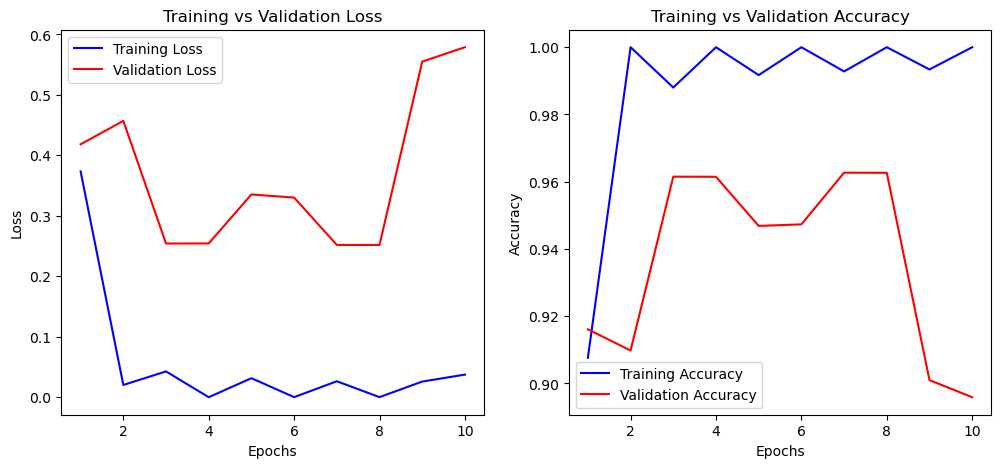

In [25]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create epochs list
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.show()
